## Crank-Nicolson PDE Convergence Analysis

This notebook analyzes the convergence behavior of the Crank-Nicolson method used for solving the Black-Scholes PDE for European vanilla options.

We compare the numerical PDE price with the analytical Black-Scholes-Merton (BSM) solution and observe how error and runtime behave as we refine the grid.

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import os, sys

sys.path.append(os.path.abspath("../../"))

from pricing.bsm import black_scholes_price
from pricing.pde import CrankNicolsonSolver

In [2]:
# Parameters:
S0 = 100        # Initial asset price
K = 100        # Strike
T = 1.0        # Time to maturity (1 year)
r = 0.05       # Risk-free rate
sigma = 0.2    # Volatility
option_type = "call"

In [4]:

grid_sizes = [20, 40, 80, 160]
pde_prices = []
pde_times = []
errors = []

# Reference price using BSM
ref_price = black_scholes_price(S0, K, T, r, sigma, option_type='call')

for N in grid_sizes:
    solver = CrankNicolsonSolver(S_max=200, K=K, T=T, r=r, sigma=sigma, M=N, N=N)
    
    start = time.time()
    price_array, grid = solver.solve()

    # Interpolate price at S0
    price = np.interp(S0, grid, price_array)
    t = time.time() - start
    
    pde_prices.append(price)
    pde_times.append(t)
    errors.append(abs(price - ref_price))

## 📈 Performance and Accuracy
We now plot the runtime and error of PDE against the number of simulation paths.

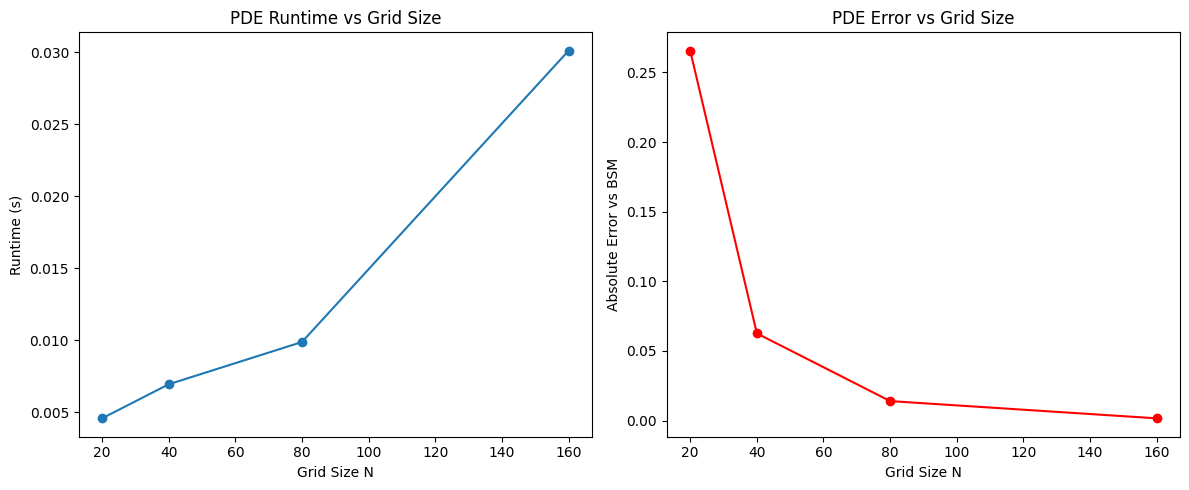

In [7]:
# Plot runtime
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(grid_sizes, pde_times, marker='o')
plt.title("PDE Runtime vs Grid Size")
plt.xlabel("Grid Size N")
plt.ylabel("Runtime (s)")

# Plot error
plt.subplot(1, 2, 2)
plt.plot(grid_sizes, errors, marker='o', color='red')
plt.title("PDE Error vs Grid Size")
plt.xlabel("Grid Size N")
plt.ylabel("Absolute Error vs BSM")

plt.tight_layout()
plt.show()

### 🔍 Observations

- The runtime increases steadily with larger grid sizes, as expected for implicit finite difference schemes.
- The absolute error between the Crank-Nicolson PDE solution and the BSM price drops significantly as the grid is refined.
- Beyond a certain grid size (e.g. N=80), the error reduction becomes marginal, showing convergence.
- This confirms that the method is both stable and second-order accurate in space and time.